## Using Model

In [60]:
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
import os

In [61]:
model = keras.models.load_model('Age&Gender-Prediction.H5')

In [62]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_layer (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 62, 62, 32)   896         ['Input_layer[0][0]']            
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 62, 62, 32)  128         ['conv2d_2[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 31, 31, 32)  0           ['batch_normalization_2[0][

In [63]:
def predict(img_path:str):
    img_ = cv2.imread(img_path)
    img = cv2.resize(img_, (64, 64)) 

    img = img.flatten()
    img = img.reshape((1, 64, 64, 3))
    prediction = model.predict(img)
    age = round(prediction[0][0][0])
    gender = prediction[1][0][0]
    plt.imshow(img_)
    
    return print(f'Age is- { age } , gender is -{"male" if gender<=0.5 else "female"}')



1/1 [==============================] - 0s 150ms/step
Age is- 33 , gender is -male


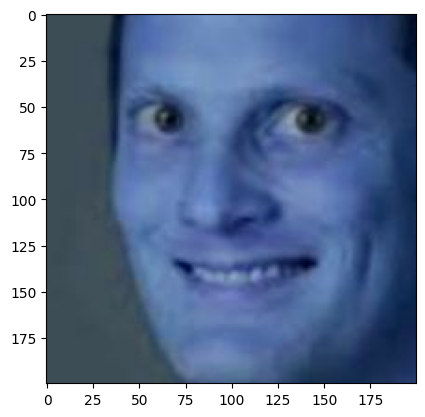

In [64]:
predict('data\\32_0_0_20170104200937337.jpg.chip.jpg')

# Camera

In [75]:
def predict(img):
    img = cv2.resize(img,(64,64))
    img = img.flatten()
    img = img.reshape((1,64,64,3))
    prediction = model.predict(img)
    age = round(prediction[0][0][0])
    gender = prediction[1][0][0]
    return age , gender


In [87]:
def draw_label(img,text,position,bg_color):

    text_size = cv2.getTextSize(text =text,fontFace = cv2.FONT_HERSHEY_COMPLEX,fontScale=1,thickness=cv2.BORDER_REPLICATE)

    end_X = position[0] + text_size[0][0] + 1
    end_Y = position[1] + text_size[0][0] - 1

    # cv2.rectangle(img,position,(end_X,end_Y),bg_color,cv2.FILLED)

    cv2.putText(img,text,position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv2.ACCESS_FAST)

In [65]:
detect = cv2.CascadeClassifier('data\haarcascade_frontalface_default.xml')

def detect_face(img):
    rect = detect.detectMultiScale(img)
    return rect

In [98]:
cap = cv2.VideoCapture(0)

In [102]:
while True:
    ret, frame = cap.read()

    frame = cv2.flip(frame, 1) # Flipping the frame horizontally

    rectangle = detect_face(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    for x,y,w,h in rectangle:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    
    age , gender = predict(frame)

    if 10 <= age <=13:
        draw_label(frame,f'your age is between 10-13',(30,30),(255,0,0))
    elif 13 <= age <=20:
        draw_label(frame,f'your age is between 13-20',(30,30),(255,0,0))
    elif 20 <= age <=25:
        draw_label(frame,f'your age is between 20-25',(30,30),(255,0,0))
    elif 25 <= age <=35:
        draw_label(frame,f'your age is between 25-35',(30,30),(255,0,0))
    else:
        draw_label(frame,f'your age is {str(age)}',(30,30),(255,0,0))



    if gender <= 0.5:
        draw_label(frame,f'You are Male',(30,60),(255,0,0))
    else:
        draw_label(frame,f'You are Female',(30,60),(255,0,0))

    cv2.imshow('Window', frame)

    if cv2.waitKey(25) & 0xFF == ord('x'):
        break

cv2.destroyAllWindows()



1/1 [==============================] - 0s 26ms/step


In [ ]:
    # img_ = cv2.imread(img_path)
    # img = cv2.resize(img_, (64, 64)) 

    # img = img.flatten()
    # img = img.reshape((1, 64, 64, 3))